# K-Means Clustering

K-means clustering is a machine learning algorithm used to group similar data points together into clusters. The algorithm works by finding the mean (centroid) of each cluster and assigning each data point to the closest centroid. The process is repeated until the cluster assignments no longer change or the changes are below a certain threshold.

## Algorithm
The general steps of the K-means clustering algorithm are:

1. Choose the number of clusters K that you want to partition the data into.
2. Randomly initialize K centroids.
3. Assign each data point to the closest centroid based on its distance from the centroid.
4. Recalculate the centroids as the mean of all data points assigned to each cluster.
5. Repeat steps 3 and 4 until convergence is reached (i.e., the cluster assignments no longer change or the changes are below a certain threshold).

The convergence criterion can be based on various factors such as the number of iterations, the difference between the old and new centroids, or the within-cluster sum of squares (WCSS) metric. The WCSS is the sum of the squared distances between each data point and its assigned centroid and can be used as a measure of how well the data points are grouped together. The optimal number of clusters K can be determined by various methods such as the elbow method or the silhouette method, which involve evaluating the WCSS or other metrics for different values of K.

---
## Perform K-Means on dataset

### Importing library



In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")


### Data Exploration

In [2]:
df = pd.read_csv('/Users/yihanhong/Desktop/577/dataset/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.describe()

In [3]:
plt.style.use('fivethirtyeight')

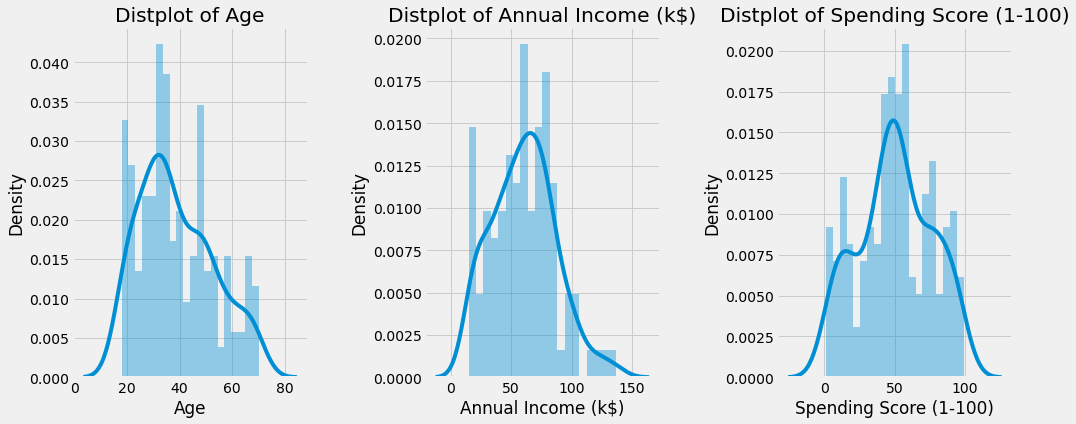

In [4]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

## Clustering using K- means


In [9]:
## Segmentation using Age and Spending Score
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

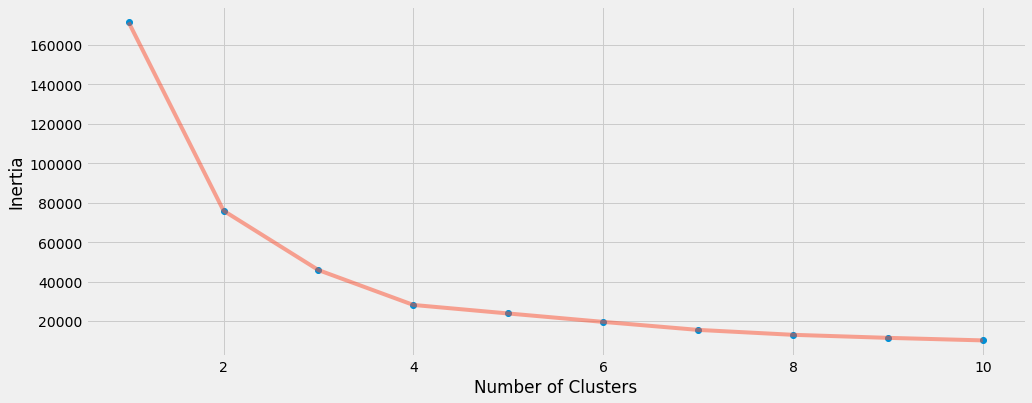

In [10]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [14]:
kmeans = KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') 
kmeans.fit(X1)
labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_

In [15]:
# The lowest SSE value
kmeans.inertia_

28165.58356662934

In [17]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[27.61702128, 49.14893617],
       [43.29166667, 15.02083333],
       [30.1754386 , 82.35087719],
       [55.70833333, 48.22916667]])

In [16]:
# The number of iterations required to converge
kmeans.n_iter_

4

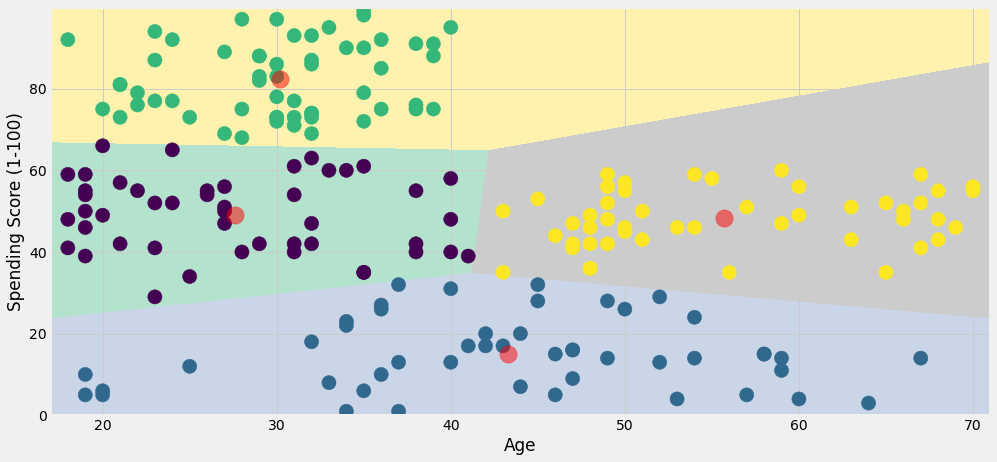

In [12]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()
